In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
# Import the NumPy module.
import numpy as np
import pandas as pd


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# zip them into pairs so that one lat goes with each lngs and then they become a tuple
lat_lngs = zip(lats, lngs)
lat_lngs
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    #cordinate [0] is column 1, cordinate [1] is column 2
    print(coordinate[0], coordinate[1])
    
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
    
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

81.20677753854036 -129.3685892990924
-43.7140040696071 -61.35379717015735
-25.47589080956776 -23.4587886834681
-11.818915387485973 0.6395030089649083
29.463224008344312 68.61725107661118
77.61165942100871 -89.79811538000371
11.672605485362809 -143.77293952857906
-88.54493096168514 14.535873113519273
55.86514945721677 169.7927806812046
-14.011044421954523 132.99327815585605
1.7113532200268509 117.44863021327285
68.9951355314667 -10.253523531765609
-37.43812514979569 75.78362682409366
-12.513264091516916 -164.97140966045745
40.98202224523456 43.6406861424272
-23.07647578561287 -48.20945946444013
-83.52394204406286 44.342982474778665
38.80336211750867 46.41594477831836
89.74864081593358 -153.249227286318
-76.17278243342615 -67.02463530868542
24.047242602651863 61.9034939993108
2.9444377370917323 84.76617997013818
18.318900526647894 47.719020231764574
-82.66239609503671 -96.76556508998748
-76.15380766924721 -167.5019375533333
-64.80027151975781 -83.46142982402014
37.79777038592387 134.2810

tuktoyaktuk ca
viedma ar
caravelas br
jamestown sh
dera bugti pk
qaanaaq gl
hilo us
bredasdorp za
nikolskoye ru
katherine au
bontang id
hofn is
mahebourg mu
samusu ws
amasia am
conchas br
port alfred za
meghri am
barrow us
ushuaia ar
jiwani pk
hambantota lk
najran sa
punta arenas cl
avarua ck
punta arenas cl
tottori jp
luangwa zm
barrow us
mortka ru
saint-philippe re
punta arenas cl
bredasdorp za
arraial do cabo br
ushuaia ar
kavieng pg
dikson ru
vila velha br
mar del plata ar
shingu jp
narsaq gl
chuy uy
namibe ao
albany au
attawapiskat ca
torrington us
cape town za
ewa beach us
khatanga ru
kapaa us
hilo us
kapaa us
illoqqortoormiut gl
bethel us
iwanai jp
luderitz na
nanortalik gl
tautira pf
new norfolk au
alta floresta br
cuamba mz
tuatapere nz
bouna ci
ushuaia ar
haibowan cn
longyearbyen sj
broome au
uige ao
hobart au
cherskiy ru
rikitea pf
vanderhoof ca
payo ph
emba kz
ushuaia ar
cam pha vn
port hardy ca
barentsburg sj
kodiak us
victoria sc
saint-pierre pm
busselton au
henties bay n

bethel us
east london za
madison heights us
bethel us
mayor pablo lagerenza py
taolanaro mg
matelica it
saskylakh ru
rumoi jp
hithadhoo mv
busselton au
bend us
saleaula ws
albany au
punta arenas cl
caravelas br
bluff nz
rikitea pf
charcas mx
celestun mx
rawson ar
ouadda cf
blairmore ca
nguiu au
inhambane mz
skjervoy no
waverly us
awbari ly
taolanaro mg
namibe ao
rikitea pf
mataura pf
atuona pf
hithadhoo mv
mayumba ga
ushuaia ar
mogzon ru
punta arenas cl
rikitea pf
enumclaw us
mar del plata ar
pipri in
nuuk gl
cairns au
thompson ca
srednekolymsk ru
camopi gf
cape town za
punta arenas cl
tasiilaq gl
rikitea pf
kavieng pg
saint george bm
butaritari ki
sitka us
floriano br
jamestown sh
flic en flac mu
wajima jp
lodja cd
bredasdorp za
ambodifototra mg
novikovo ru
kupang id
albany au
albany au
tuktoyaktuk ca
new norfolk au
lohja fi
marawi sd
yellowknife ca
punta arenas cl
lhokseumawe id
nizhneyansk ru
rikitea pf
nantucket us
qaanaaq gl
arraial do cabo br
prince rupert ca
puerto ayora ec
marz

639

In [3]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [4]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | viedma
Processing Record 3 of Set 1 | caravelas
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | dera bugti
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | katherine
Processing Record 11 of Set 1 | bontang
Processing Record 12 of Set 1 | hofn
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | samusu
City not found. Skipping...
Processing Record 15 of Set 1 | amasia
Processing Record 16 of Set 1 | conchas
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | meghri
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | jiwani
Processing Record 22 of Set 1 | hambantota
Processing Record 23 of Set 1 | najran
Processing Record 24 of Set 1 | punta arenas
P

Processing Record 38 of Set 4 | kalakamati
Processing Record 39 of Set 4 | saleaula
City not found. Skipping...
Processing Record 40 of Set 4 | panjwin
City not found. Skipping...
Processing Record 41 of Set 4 | kang
Processing Record 42 of Set 4 | ituni
City not found. Skipping...
Processing Record 43 of Set 4 | olmos
Processing Record 44 of Set 4 | bargal
City not found. Skipping...
Processing Record 45 of Set 4 | alakurtti
Processing Record 46 of Set 4 | lakatoro
Processing Record 47 of Set 4 | booue
Processing Record 48 of Set 4 | tombouctou
Processing Record 49 of Set 4 | santa barbara
Processing Record 50 of Set 4 | thaba nchu
Processing Record 1 of Set 5 | bubaque
Processing Record 2 of Set 5 | bilma
Processing Record 3 of Set 5 | ahipara
Processing Record 4 of Set 5 | sorong
Processing Record 5 of Set 5 | anchorage
Processing Record 6 of Set 5 | bengkulu
Processing Record 7 of Set 5 | tuscaloosa
Processing Record 8 of Set 5 | pokhara
Processing Record 9 of Set 5 | markova
Proce

Processing Record 27 of Set 8 | portobelo
Processing Record 28 of Set 8 | ruzhyn
Processing Record 29 of Set 8 | athabasca
Processing Record 30 of Set 8 | kimbe
Processing Record 31 of Set 8 | rio pardo
Processing Record 32 of Set 8 | tommot
Processing Record 33 of Set 8 | lowestoft
Processing Record 34 of Set 8 | makokou
Processing Record 35 of Set 8 | orange cove
Processing Record 36 of Set 8 | trelew
Processing Record 37 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 38 of Set 8 | nuuk
Processing Record 39 of Set 8 | kirakira
Processing Record 40 of Set 8 | boddam
Processing Record 41 of Set 8 | san cristobal
Processing Record 42 of Set 8 | kalanguy
Processing Record 43 of Set 8 | kalmunai
Processing Record 44 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 45 of Set 8 | juifang
City not found. Skipping...
Processing Record 46 of Set 8 | mao
Processing Record 47 of Set 8 | praia da vitoria
Processing Record 48 of Set 8 | madison heights
Proc

Processing Record 15 of Set 12 | mogocha
Processing Record 16 of Set 12 | port macquarie
Processing Record 17 of Set 12 | alnashi
Processing Record 18 of Set 12 | along
Processing Record 19 of Set 12 | malanje
Processing Record 20 of Set 12 | bekwai
Processing Record 21 of Set 12 | agadir
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | port-gentil
Processing Record 24 of Set 12 | kieta
Processing Record 25 of Set 12 | plastun
Processing Record 26 of Set 12 | ahuimanu
Processing Record 27 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 28 of Set 12 | ligayan
Processing Record 29 of Set 12 | nikolsk
Processing Record 30 of Set 12 | adrar
Processing Record 31 of Set 12 | grindavik
Processing Record 32 of Set 12 | ballina
Processing Record 33 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 34 of Set 12 | abu kamal
Processing Record 35 of Set 12 | kloulklubed
Processing Record 36 of Set 12 | det udom
Processing Record 3

In [5]:
len(city_data)

584

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,-12.19,95,100,6.91,CA,2023-01-23 20:07:12
1,Viedma,-40.8135,-62.9967,90.23,24,0,17.52,AR,2023-01-23 20:03:37
2,Caravelas,-17.7125,-39.2481,81.81,78,100,10.78,BR,2023-01-23 20:07:24
3,Jamestown,42.0970,-79.2353,31.59,72,100,10.36,US,2023-01-23 20:07:28
4,Dera Bugti,29.0307,69.1510,47.73,28,0,4.00,PK,2023-01-23 20:07:33
5,Qaanaaq,77.4840,-69.3632,-18.44,59,27,7.09,GL,2023-01-23 20:07:35
6,Hilo,19.7297,-155.0900,81.28,82,75,7.00,US,2023-01-23 20:04:57
7,Bredasdorp,-34.5322,20.0403,66.09,68,13,10.60,ZA,2023-01-23 20:07:53
8,Nikolskoye,59.7035,30.7861,21.09,96,82,4.83,RU,2023-01-23 20:07:54
9,Katherine,-14.4667,132.2667,77.32,83,100,5.75,AU,2023-01-23 20:07:54


In [7]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2023-01-23 20:07:12,69.4541,-133.0374,-12.19,95,100,6.91
1,Viedma,AR,2023-01-23 20:03:37,-40.8135,-62.9967,90.23,24,0,17.52
2,Caravelas,BR,2023-01-23 20:07:24,-17.7125,-39.2481,81.81,78,100,10.78
3,Jamestown,US,2023-01-23 20:07:28,42.0970,-79.2353,31.59,72,100,10.36
4,Dera Bugti,PK,2023-01-23 20:07:33,29.0307,69.1510,47.73,28,0,4.00
5,Qaanaaq,GL,2023-01-23 20:07:35,77.4840,-69.3632,-18.44,59,27,7.09
6,Hilo,US,2023-01-23 20:04:57,19.7297,-155.0900,81.28,82,75,7.00
7,Bredasdorp,ZA,2023-01-23 20:07:53,-34.5322,20.0403,66.09,68,13,10.60
8,Nikolskoye,RU,2023-01-23 20:07:54,59.7035,30.7861,21.09,96,82,4.83
9,Katherine,AU,2023-01-23 20:07:54,-14.4667,132.2667,77.32,83,100,5.75


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [10]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

'01/23/23'

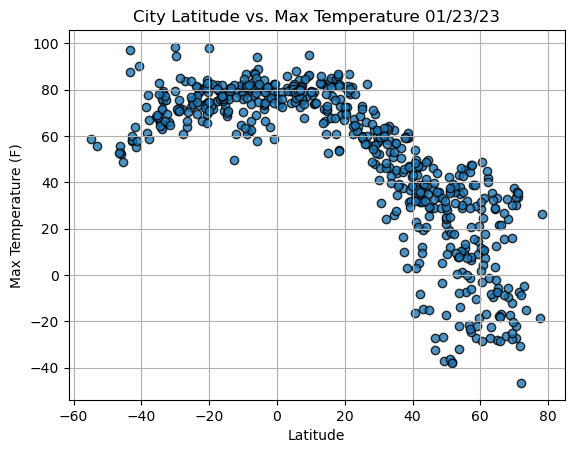

In [11]:
# Import time module
import time

# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

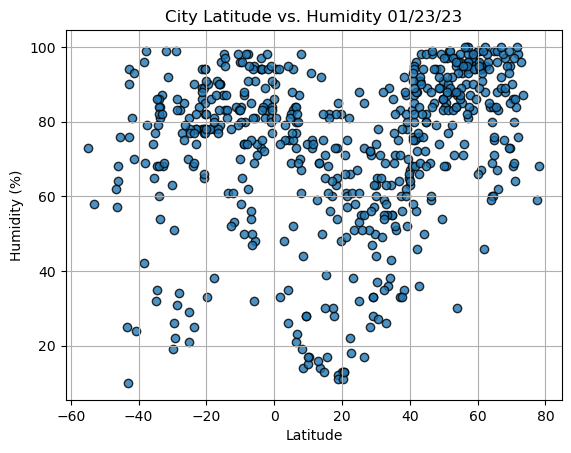

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

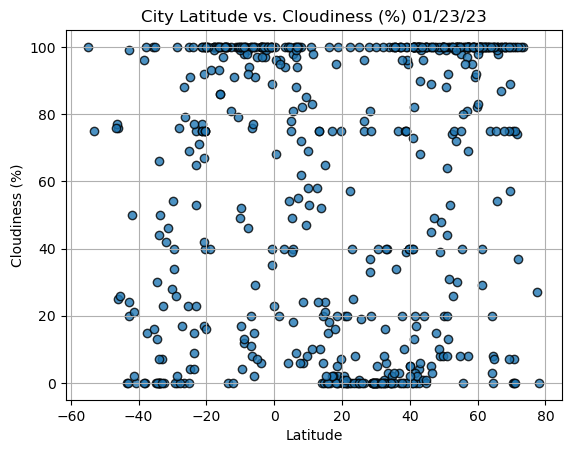

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

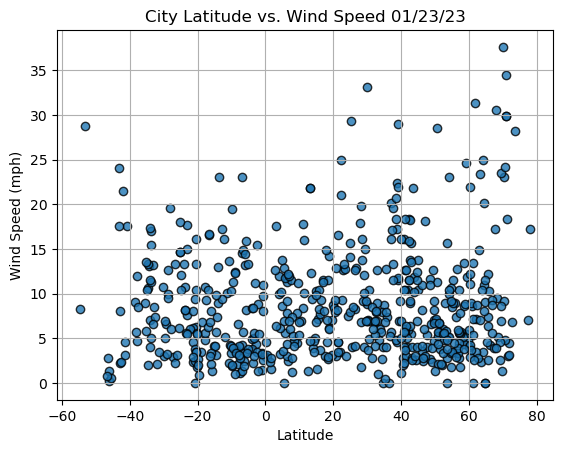

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

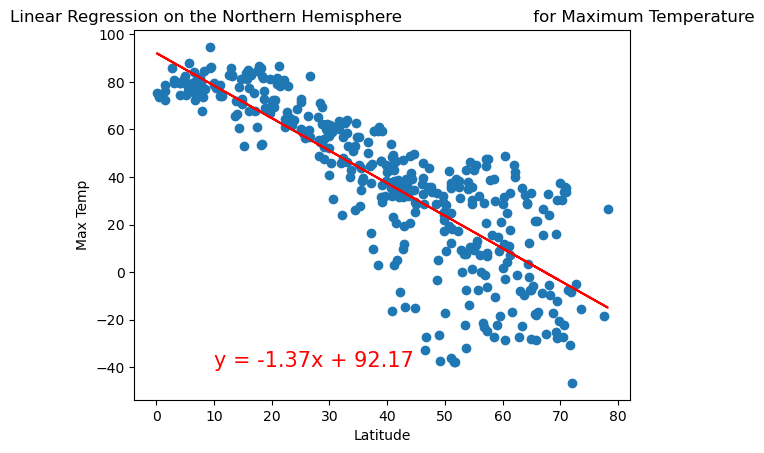

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

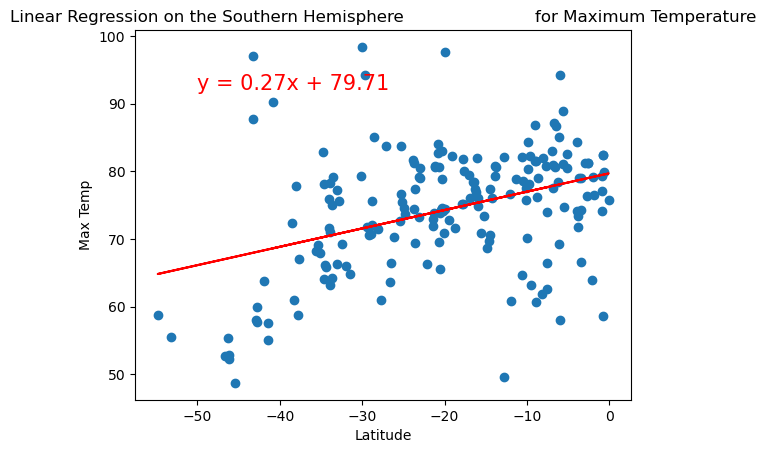

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,92))

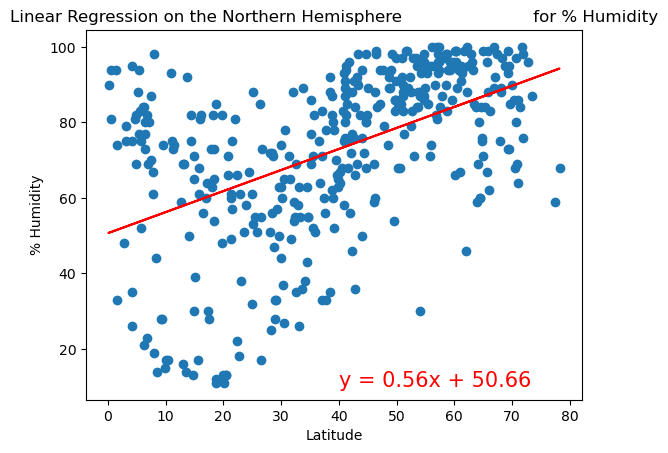

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

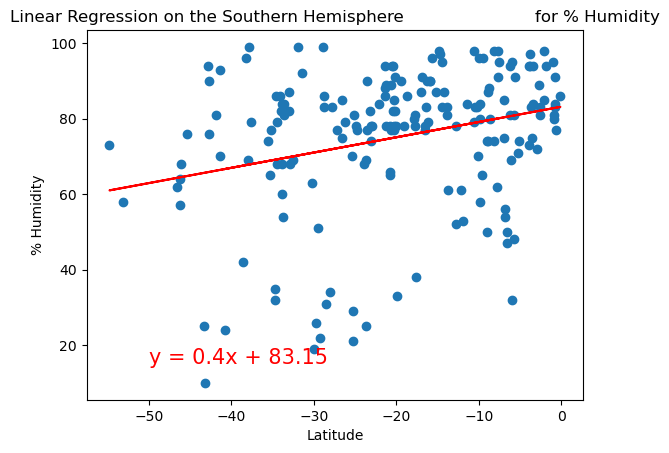

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

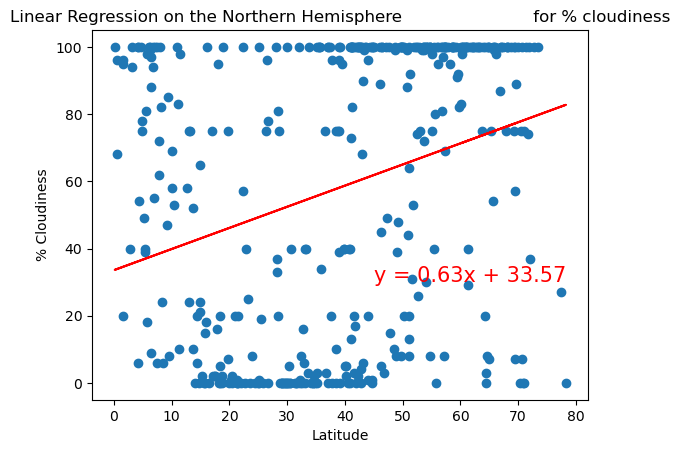

In [32]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % cloudiness', '% Cloudiness',(45,30))

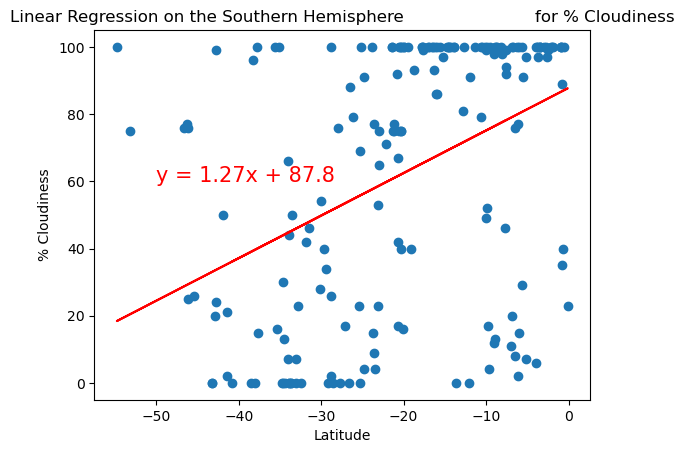

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

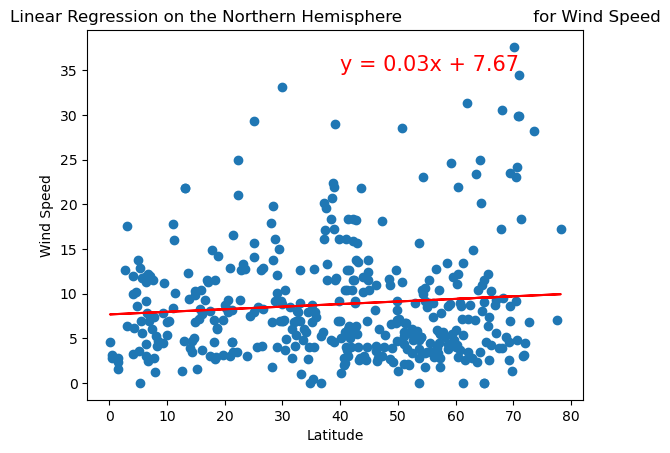

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

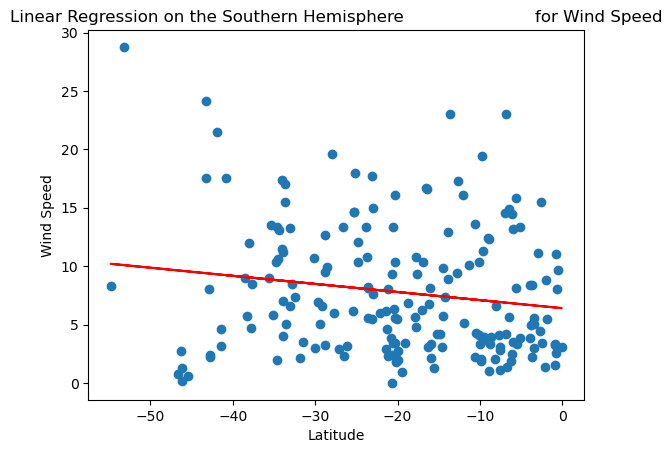

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))